In [1]:
import pickle
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
% matplotlib inline

In [32]:
raw_china = pd.read_pickle('news_dfs/china_today_final_df.pkl')
china = raw_china[(raw_china.year == 2016)& (raw_china.month != 9)]

# Topic Modeling

In [43]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.4, min_df = 15,
                                   stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(china.article)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
nmf = NMF(n_components = 60, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)

In [44]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic:" + str(int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [45]:
transformed_data = nmf.transform(tfidf)

# Top Words Per Topic

In [47]:
print_top_words(nmf, tfidf_feature_names, 20)

Topic:1
chinese embassy culture monkey uk art year festival tourists ambassador zhang com film liu cultural food daily beijing americans cn
Topic:2
dprk test korea launch nuclear pyongyang missile ballistic council republic sanctions rocket democratic bomb hydrogen resolutions security resolution satellite kim
Topic:3
trump republican cruz donald presidential campaign candidate nominee senator clinton nomination republicans race ted rubio convention rally ryan ohio party
Topic:4
brussels belgian airport attacks belgium paris abdeslam explosions rtbf metro prosecutor man security suspect terrorist france arrested salah station broadcaster
Topic:5
sea south philippines islands disputes military arbitration navigation freedom countries maritime region asean law hong defense territorial ministry issue lu
Topic:6
zika virus health mosquito microcephaly cases disease infected dengue brazil spread aedes outbreak americas transmission mosquitoes aegypti pregnant infection vaccine
Topic:7
cuban

# Labels for Topic

In [156]:
topics = {1:'China Influence', 2:'North Korea',
         3:'U.S. Presidential Election', 4:'Brussels Attack',
          5: 'China-Philippines Maritime Dispute', 6: 'Zika',
          7: 'Cuba', 8: 'Brexit',
          9: 'Brazil Corruption', 10: 'Cuba',
          11: 'Japan', 12: 'Turkey Coup',
          13: 'China-American Relations', 14: 'Malaysian Airlines Crash',
          15: 'Myanmar', 16: "Syria",
          17: 'Earthquakes', 18: 'Rio Olympics',
          19: 'Germany', 20: 'India',
          21: 'Russia', 22: 'other',
          23: 'U.S. Democratic Primary', 24: 'Africa',
          25: 'New Zealand', 26: "New York Winter",
         27: 'Australia', 28: 'South Korea', 
         29: 'other', 30: 'Sri Lanka Floods',
         31: 'California Fires', 32: 'U.S. Steel Tariffs',
         33: 'Vietnam', 34: 'Climate Change',
         35: 'Other' , 36: 'Akai Gurleyg Shooting', 
         37: 'Economy' , 38: 'U.S.: Obama', 
         39: 'Canada', 40: 'EgyptAir Crash',
         41: 'other', 42: 'San Francisco',
         43: 'Apple-FBI Dispute', 44: 'Tourism',
         45: 'U.K.', 46: 'Schools',
         47: 'Mekong Drought', 48: 'Space', 
         49:'South Korea', 50: 'Construction',
         51: 'Animals', 52: 'Nuclear Energy',
         53: 'Iran', 54: 'other',
         55: 'Afghanistan', 56: 'Police', 
         57: 'other', 58: 'Nepal', 
         59: 'Kenya Nairobi Preserve', 60: 'Mexico'}

# Dealing With Data

In [157]:
final_data = pd.DataFrame(transformed_data).applymap(lambda x: 1 if x>0.15 else 0)
final_data.columns = topics.values()
final_data['month'] = [i for i in china.month]
by_month = final_data.groupby('month').sum()
for i in range(8):
    by_month.iloc[i] = by_month.iloc[i]/float(np.sum(by_month.iloc[i]))

In [158]:
by_month.to_pickle('china_month.pkl')

In [2]:
by_month = pd.read_pickle('china_month.pkl')

# Top Topics Per Month

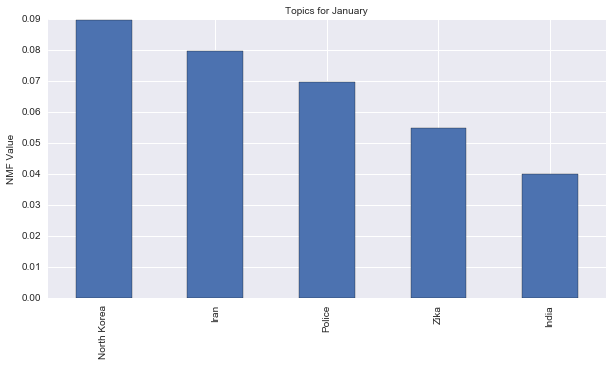

In [3]:
# Syrian Aleppo Advance
# Zika
rc={'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 10, 'font.size': 10, 'legend.fontsize': 30.0, 'axes.titlesize': 10, "figure.figsize": [10, 5]}
sns.set(rc = rc)
by_month.iloc[0].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for January')

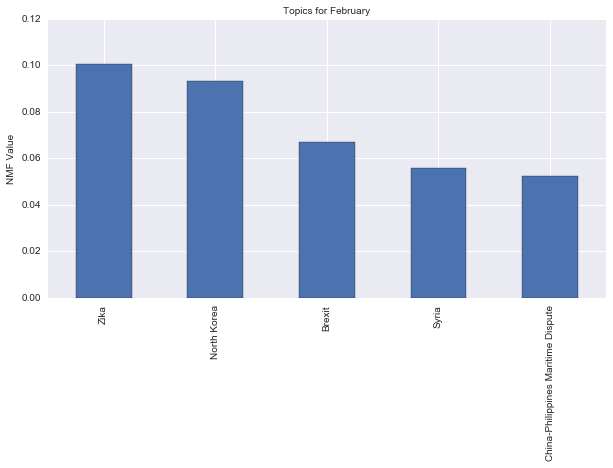

In [4]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[1].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for February')

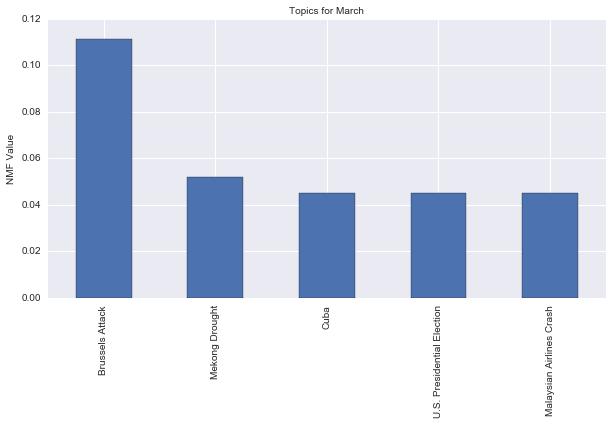

In [5]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[2].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for March')

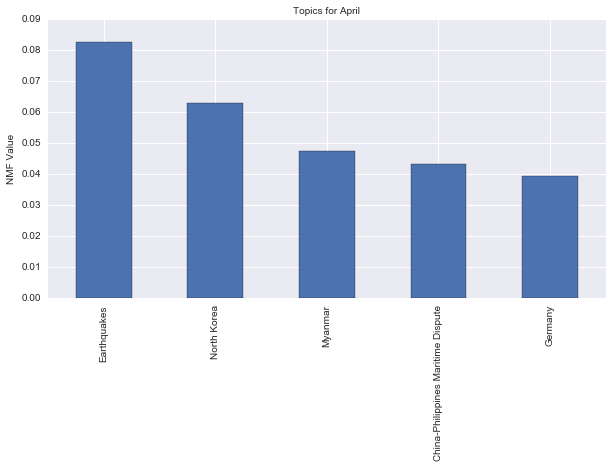

In [6]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[3].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for April')

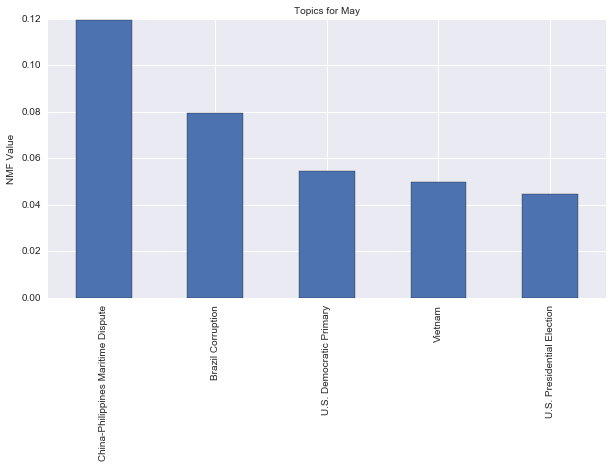

In [7]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[4].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for May')

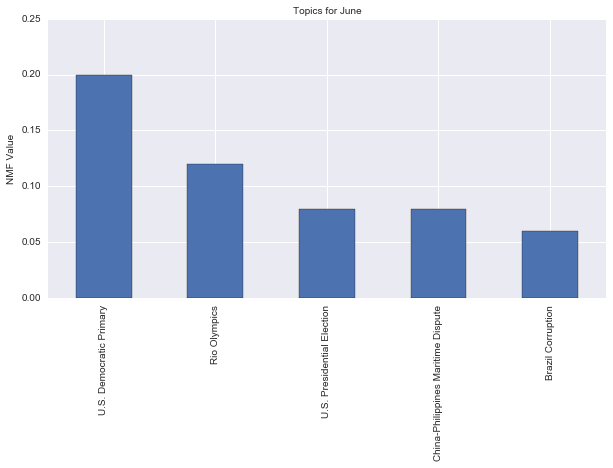

In [8]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[5].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for June')

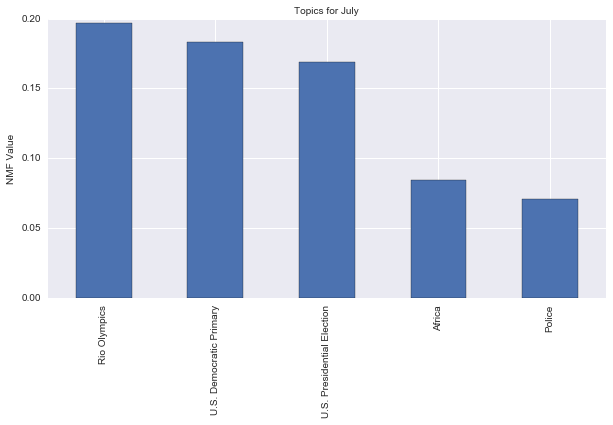

In [9]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[6].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for July')

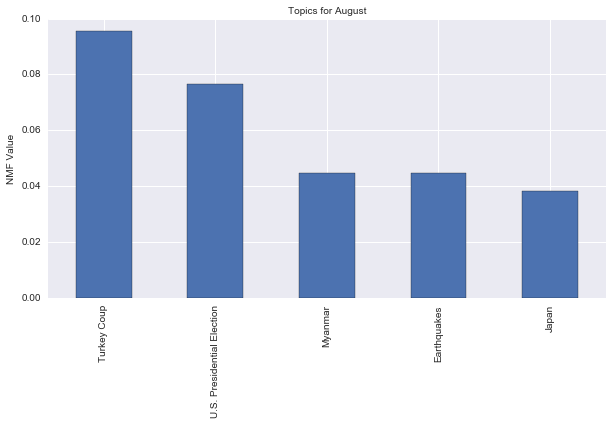

In [10]:
# Syrian Aleppo Advance
# Zika
by_month.iloc[7].sort_values(ascending = False).head().plot(kind = 'bar')
plt.ylabel('NMF Value')
_ = plt.title('Topics for August')

# Top Topics for the Year

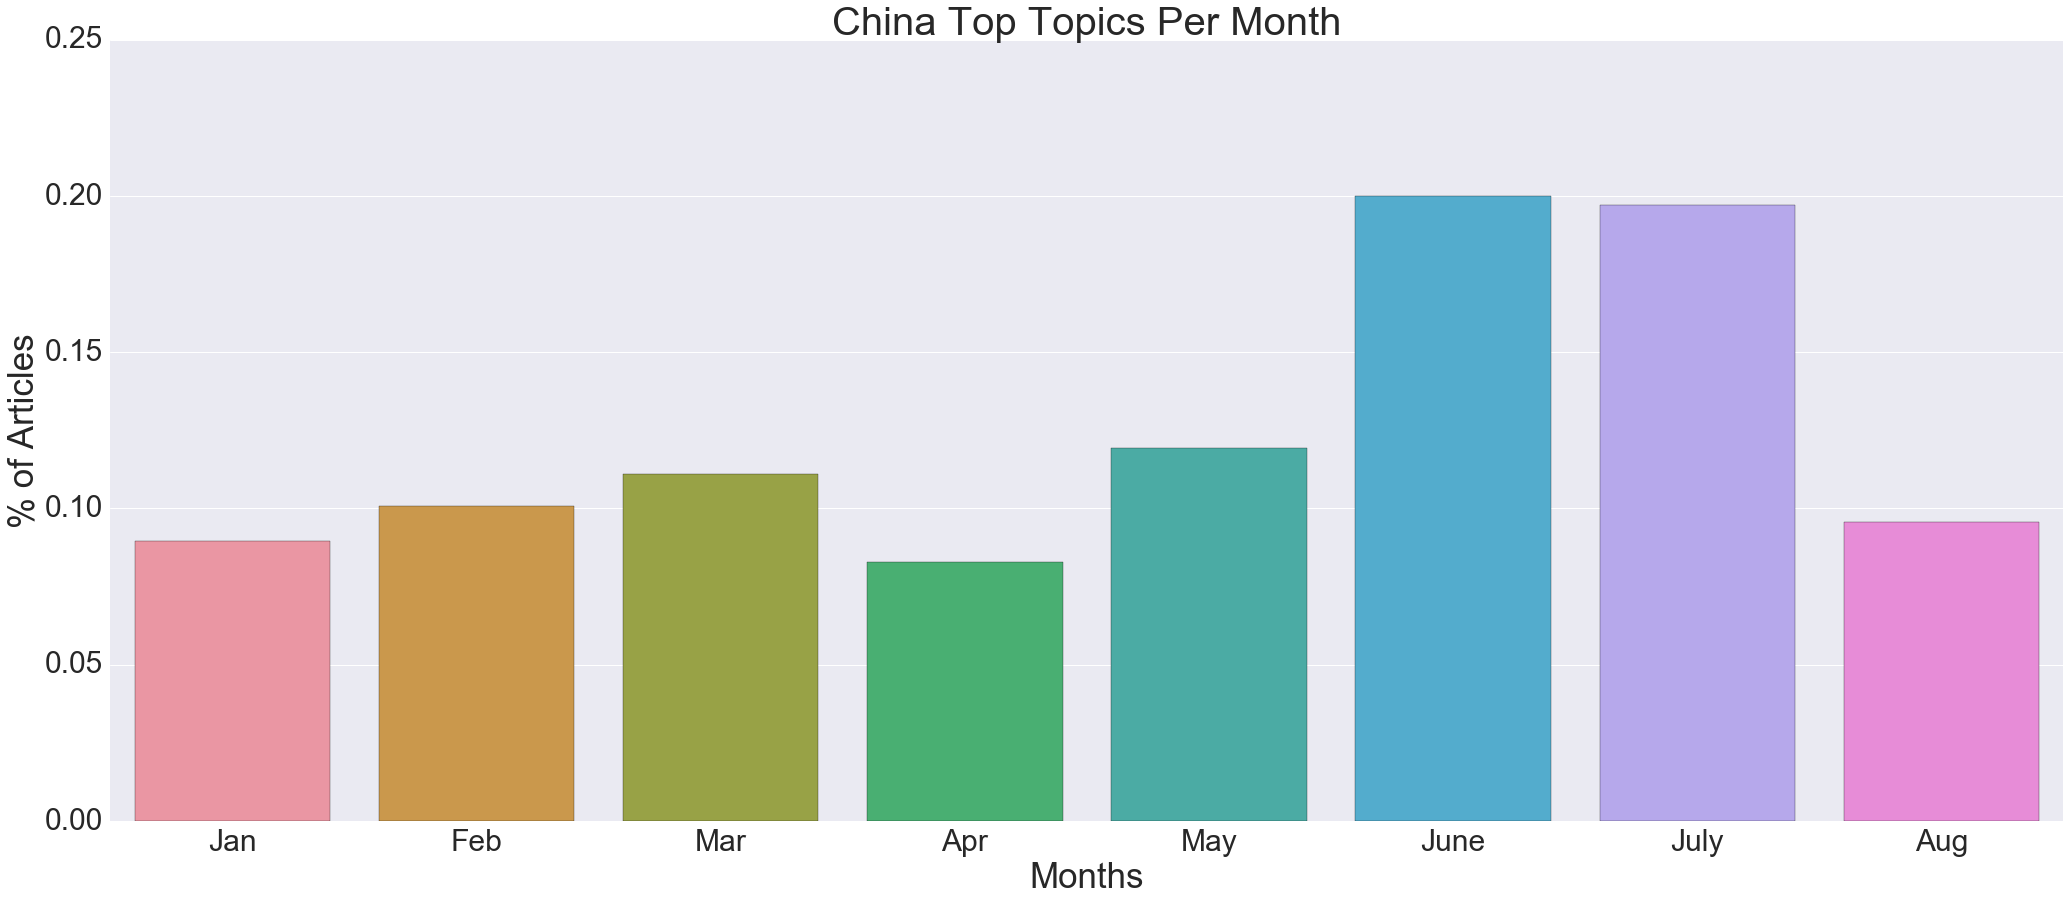

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', "June", "July", "Aug"]

lst = []
topics_ =[]
for i in range(8):
    x = by_month.iloc[i].sort_values(ascending = False).head(1)
    lst.append(x[0])
    topics_.append(x.keys()[0])
rc={'xtick.labelsize': 30, 'ytick.labelsize': 30, 'axes.labelsize': 25, 'font.size': 25, 'legend.fontsize': 30.0, 'axes.titlesize': 20, "figure.figsize": [35, 14]}
sns.set(rc = rc)
sns.barplot(x = months, y = lst)
plt.title('China Top Topics Per Month', fontsize=40)
plt.xlabel('Months', fontsize=35)
_ = plt.ylabel('% of Articles', fontsize=35)

In [15]:
topics_

['North Korea',
 'Zika',
 'Brussels Attack',
 'Earthquakes',
 'China-Philippines Maritime Dispute',
 'U.S. Democratic Primary',
 'Rio Olympics',
 'Turkey Coup']